In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import os
import matplotlib.pyplot as plt

In [3]:
warnings.filterwarnings("ignore")
hr = pd.read_csv("HR-Employee-Attrition.csv") #Read the dataset
hr.head() #Display first 5 rows of the data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


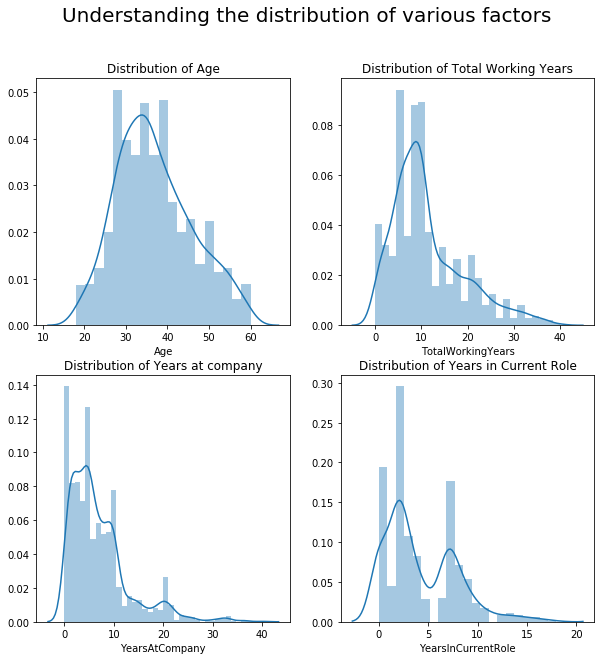

In [4]:
# Reference for adding title for each sub plots: https://gist.github.com/dyerrington/dac39db54161dafc9359995924413a12
fig,ax = plt.subplots(2,2, figsize=(10,10)) # 'ax' has references to all the four axes
plt.suptitle("Understanding the distribution of various factors", fontsize=20)
sns.distplot(hr['Age'], ax = ax[0,0])  # Plot on 1st axes
ax[0][0].set_title('Distribution of Age')
sns.distplot(hr['TotalWorkingYears'], ax = ax[0,1])  # Plot on IInd axes
ax[0][1].set_title('Distribution of Total Working Years')
sns.distplot(hr['YearsAtCompany'], ax = ax[1,0])  # Plot on IIIrd axes
ax[1][0].set_title('Distribution of Years at company')
sns.distplot(hr['YearsInCurrentRole'], ax = ax[1,1])  # Plot on IV the axes
ax[1][1].set_title('Distribution of Years in Current Role')
plt.show()

# EDA 

## Countplot

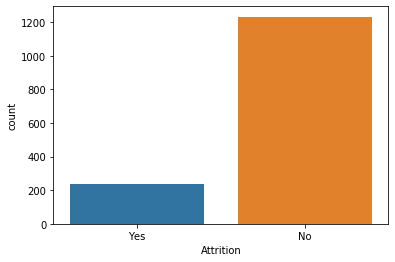

In [5]:
sns.countplot(hr['Attrition'])
plt.show()

## Barplot

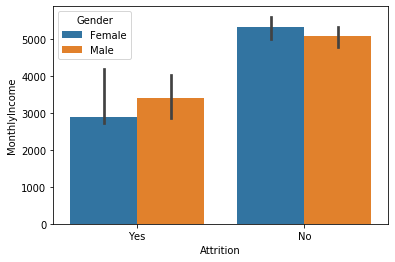

In [6]:
#Bar plot of MOnthly income from the rate of attrition according to gender
#Estimator used is median
from numpy import median
sns.barplot(x='Attrition', y='MonthlyIncome', hue= 'Gender',data=hr, estimator=median)# hue= Categorical variable , estimator- Statistical function to estimate within each categorical bin.
plt.show()

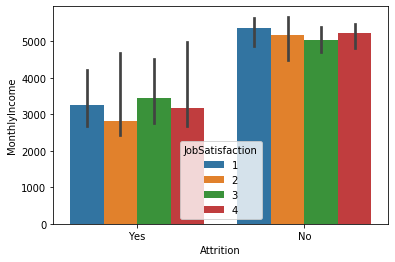

In [7]:
#Bar plot of Job Satisfaction with respect to Monthly income from home according to gender
#Estimator used is median
from numpy import median
sns.barplot(x='Attrition', y='MonthlyIncome', hue= 'JobSatisfaction',data=hr, estimator=median)# hue= Categorical variable , estimator- Statistical function to estimate within each categorical bin.
plt.show()

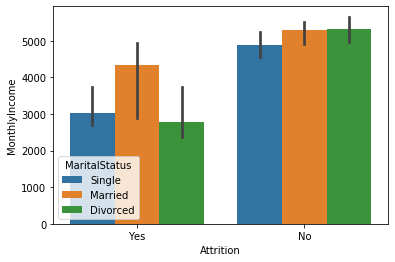

In [8]:
#Bar plot of Job Satisfaction with respect to Monthly income from home according to gender
#Estimator used is median
from numpy import median
sns.barplot(x='Attrition', y='MonthlyIncome', hue= 'MaritalStatus',data=hr, estimator=median)# hue= Categorical variable , estimator- Statistical function to estimate within each categorical bin.
plt.show()

## Box plot

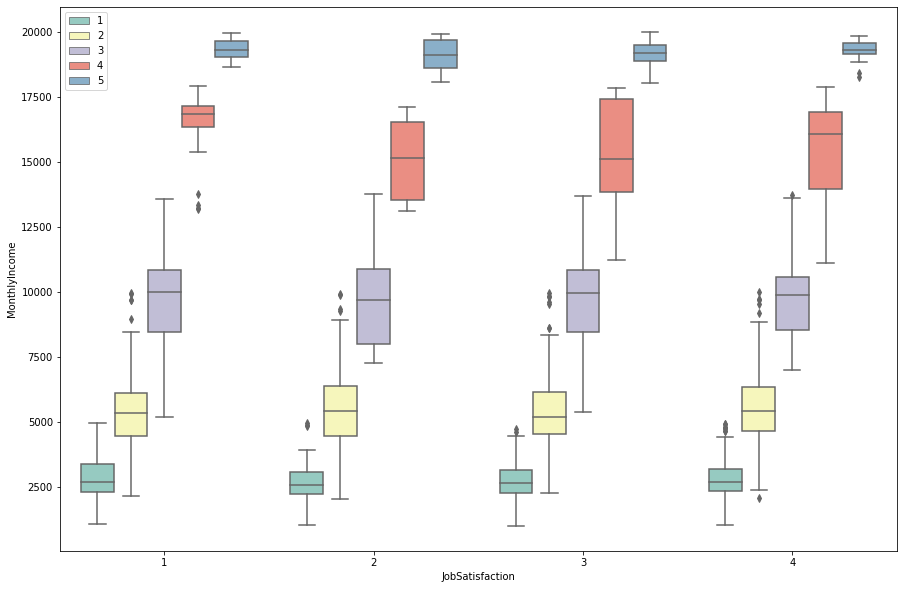

In [9]:
f,ax = plt.subplots(figsize=(15,10))
sns.boxplot(x='JobSatisfaction', y='MonthlyIncome', data=hr, hue='JobLevel',palette='Set3')
plt.legend(loc='best')
plt.show()

## Violin plot

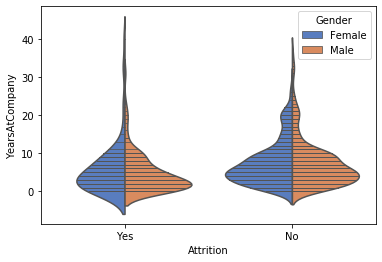

In [10]:
sns.violinplot(x="Attrition", y="YearsAtCompany", hue="Gender", data=hr, palette="muted", split=True,
               inner="stick")# When using hue nesting with a variable that takes two levels,
                                 # setting split to True will draw half of a violin for each level. 
                                #This can make it easier to directly compare the distributions.
plt.show()

## Scatter plot

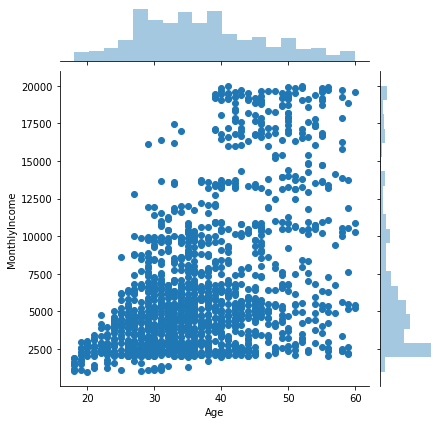

In [11]:
## Scatter plot
sns.jointplot(hr.Age,hr.MonthlyIncome, kind = "scatter")   
plt.show()

## Pair plot

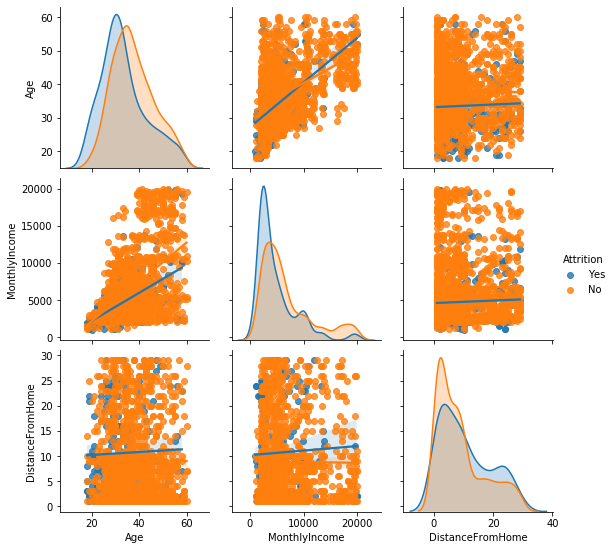

In [12]:
data1 = ['Attrition','Age','MonthlyIncome','DistanceFromHome']
sns.pairplot(hr[data1], kind="reg", diag_kind = "kde" , hue = 'Attrition' )
plt.show()

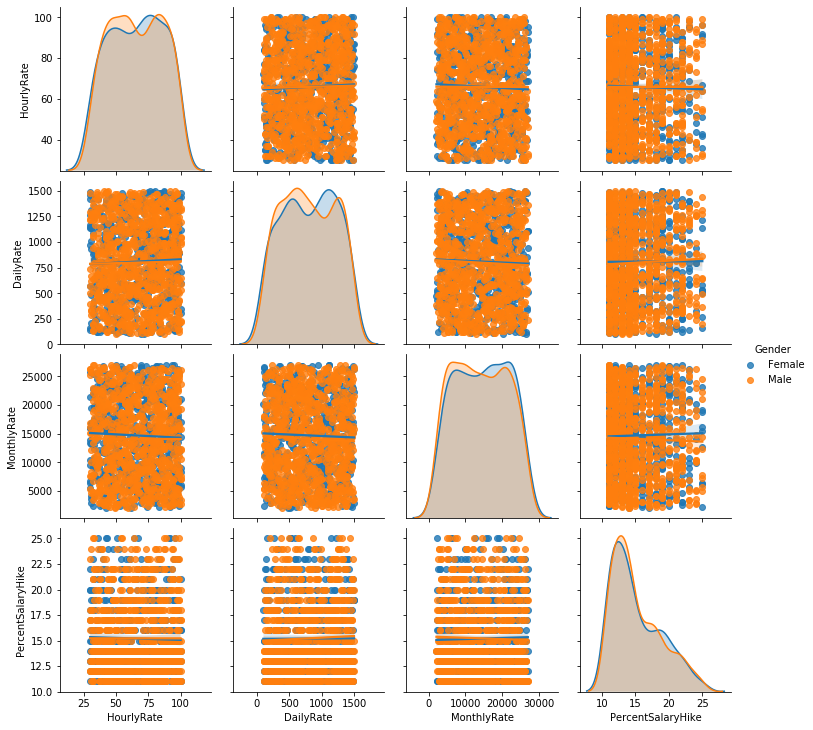

In [13]:
data2 = ['Gender', 'HourlyRate','DailyRate','MonthlyRate','PercentSalaryHike']
sns.pairplot(hr[data2], kind="reg", diag_kind = "kde" , hue = 'Gender' )
plt.show()

# Correlation

In [15]:
#correlation
hr.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


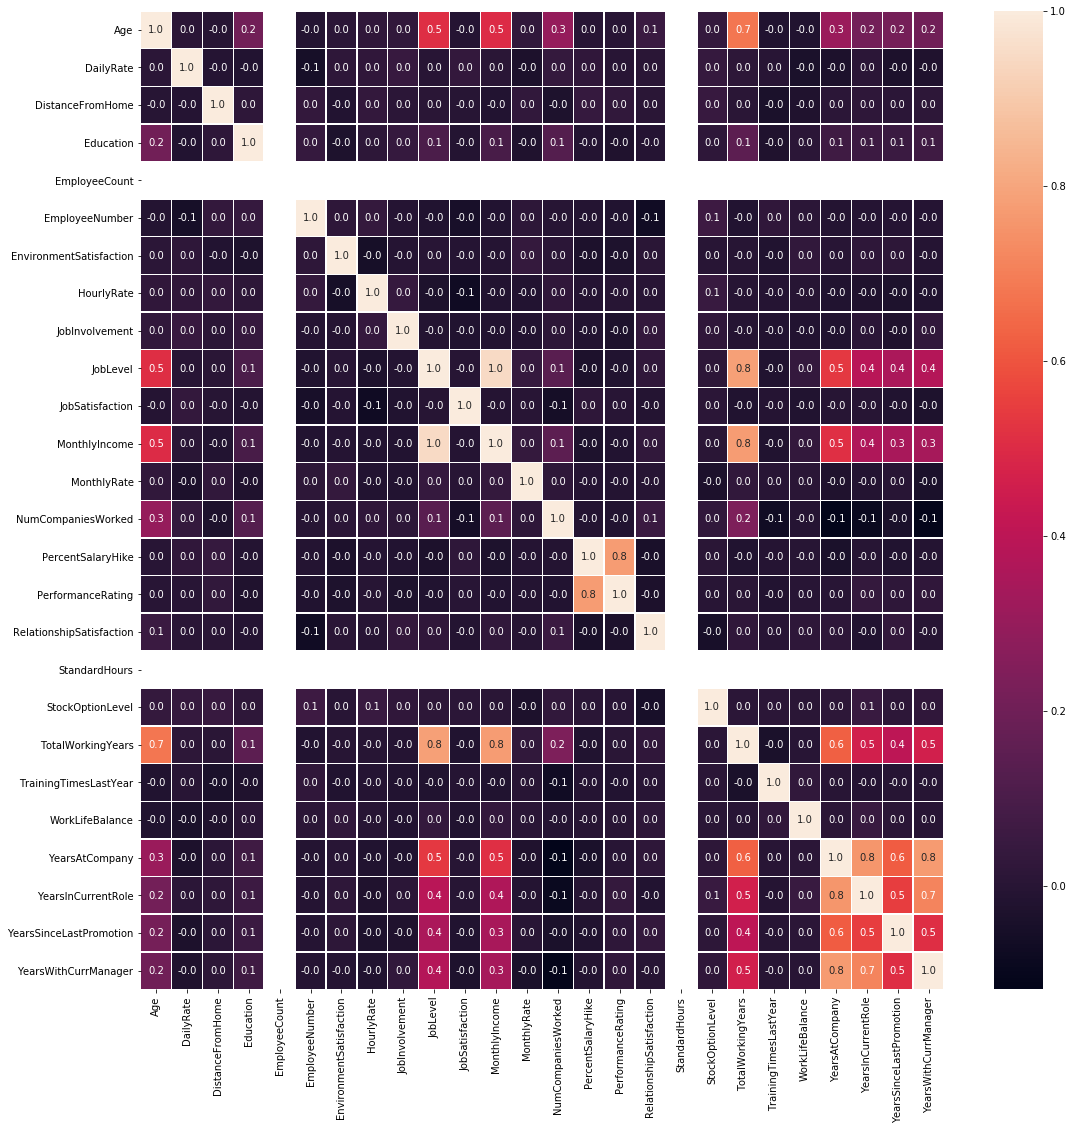

In [14]:
#Plot a correlation map for all numeric variables
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(hr.corr(), annot=True, linewidths=.4, fmt= '.1f',ax=ax)
plt.show()

In [16]:
hr.describe

<bound method NDFrame.describe of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Educati

# Pre-processing 

## Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#Create a label Encoder object
le = LabelEncoder()

In [21]:
hr.shape

(1470, 35)

In [22]:
#label encoding will be used for columns with 2 or less unique values
le_count = 0
for col in hr.columns[1:]:
    if hr[col].dtype == 'object':
        if len(list (hr[col].unique())) <=2:
            le.fit (hr[col])
            hr[col] = le.transform (hr[col])
            le_count += 1
print ('{} columns were label encoded.'. format(le_count))            



4 columns were label encoded.


In [23]:
#convert rest of categorical variable into dummy
hr = pd.get_dummies(hr, drop_first = True)

In [24]:
print (hr.shape)

(1470, 49)


In [25]:
hr.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,1,2,3,1,61,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,...,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,...,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,...,0,1,0,0,0,0,0,0,1,0


# Splitting data into testing & training data

In [50]:
#assign the target to a new dataframe and convert it to a numerical feature
#df_target = hr[['Attrition']].copy()
from sklearn.model_selection import train_test_split
target = hr['Attrition'].copy()

In [53]:
#since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
#let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
for i in range (0,1000) :
     X_train, X_test, Y_train, Y_test = train_test_split (hr, 
                                                          target, 
                                                          test_size = 0.25, 
                                                          random_state =i, 
                                                          stratify = target)

In [55]:
print(X_train.shape, '\t', X_test.shape)

(1102, 49) 	 (368, 49)


In [56]:
print(Y_train.shape, '\t', Y_test.shape)

(1102,) 	 (368,)
